## ANALYSE EXPLORATOIRE

 Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config d'affichage
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (12, 6)


Chargement des données

In [5]:
df = pd.read_csv("../data/energy_weather_paris.csv")
df.head()

,date,temp_moyenne,temp_min,temp_max,precipitations,neige,direction_vent,vitesse_vent,rafales_vent,pression,ensoleillement,conso_kw
0,2023-01-01,13.1,11.4,15.0,5.4,NaN,NaN,15.2,50.0,1015.0,0.0,345426.0
1,2023-01-02,10.8,7.7,14.3,2.2,NaN,NaN,11.4,46.0,1020.0,99.0,410791.0
2,2023-01-03,7.7,5.7,9.7,1.2,NaN,NaN,12.1,37.0,1028.4,182.0,449894.0
3,2023-01-04,11.8,9.9,13.6,1.2,NaN,NaN,19.0,57.0,1024.5,2.0,437677.0
4,2023-01-05,12.8,11.5,13.8,0.2,NaN,NaN,11.1,39.0,1025.0,18.0,417878.0


Aperçu et nettoyage

In [6]:

df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            914 non-null    object 
 1   temp_moyenne    914 non-null    float64
 2   temp_min        914 non-null    float64
 3   temp_max        914 non-null    float64
 4   precipitations  914 non-null    float64
 5   neige           7 non-null      float64
 6   direction_vent  0 non-null      float64
 7   vitesse_vent    914 non-null    float64
 8   rafales_vent    914 non-null    float64
 9   pression        914 non-null    float64
 10  ensoleillement  903 non-null    float64
 11  conso_kw        914 non-null    float64
dtypes: float64(11), object(1)
memory usage: 85.8+ KB


date                0
temp_moyenne        0
temp_min            0
temp_max            0
precipitations      0
neige             907
direction_vent    914
vitesse_vent        0
rafales_vent        0
pression            0
ensoleillement     11
conso_kw            0
dtype: int64

Analyse univariée

Text(0.5, 1.0, 'Distribution de la consommation électrique (kW)')

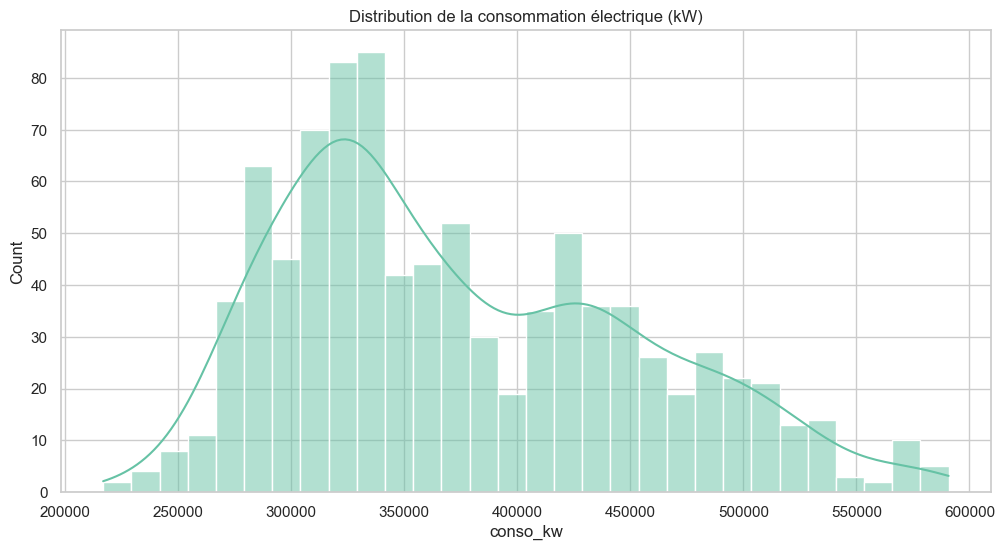

In [8]:
# Distribution de la consommation
sns.histplot(df["conso_kw"], bins=30, kde=True)
plt.title("Distribution de la consommation électrique (kW)")


Text(0.5, 1.0, 'Distribution de la température moyenne')

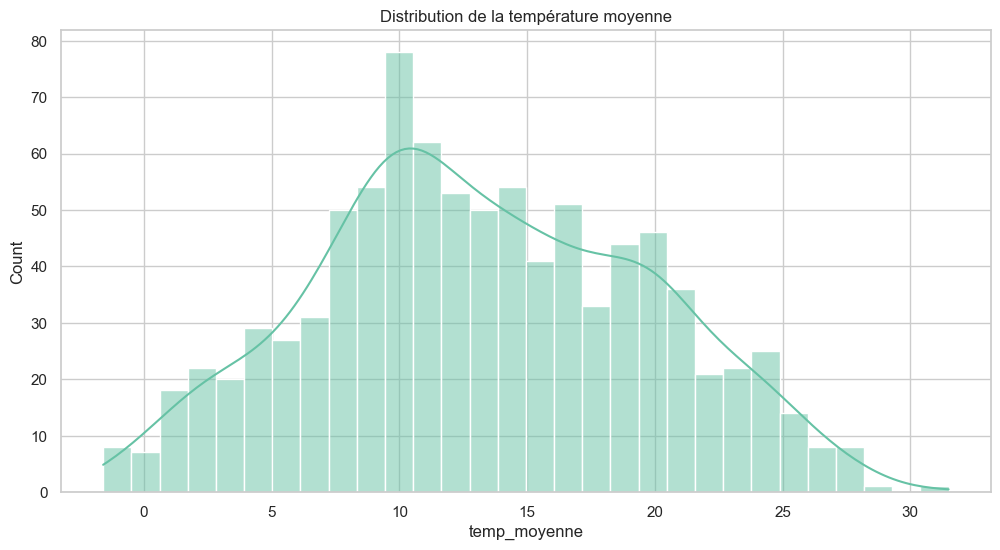

In [9]:

# Température moyenne
sns.histplot(df["temp_moyenne"], bins=30, kde=True)
plt.title("Distribution de la température moyenne")


Analyse temporelle

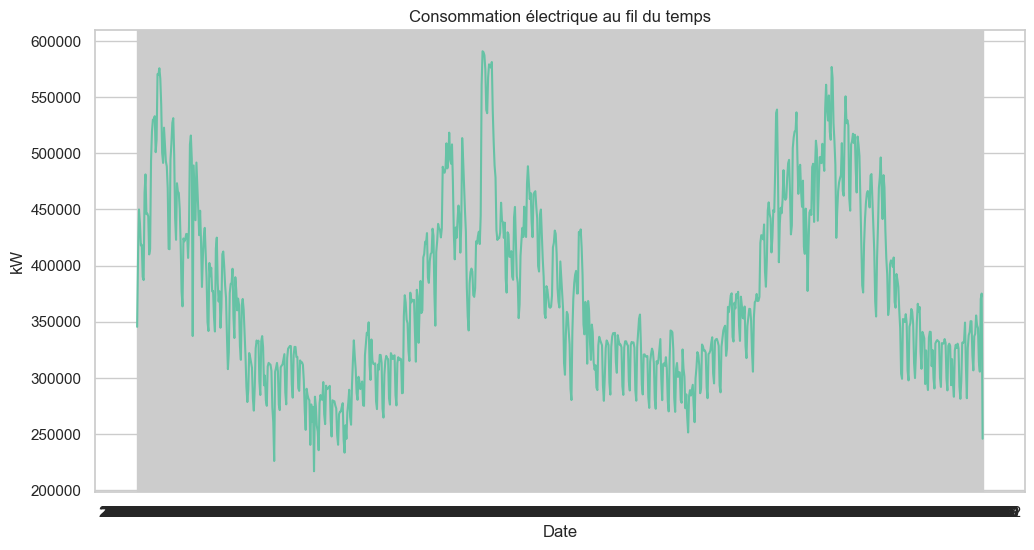

In [18]:
plt.plot(df["date"], df["conso_kw"], label="Consommation (kW)")
plt.title("Consommation électrique au fil du temps")
plt.xlabel("Date")
plt.ylabel("kW")
plt.show()


Évolution des températures

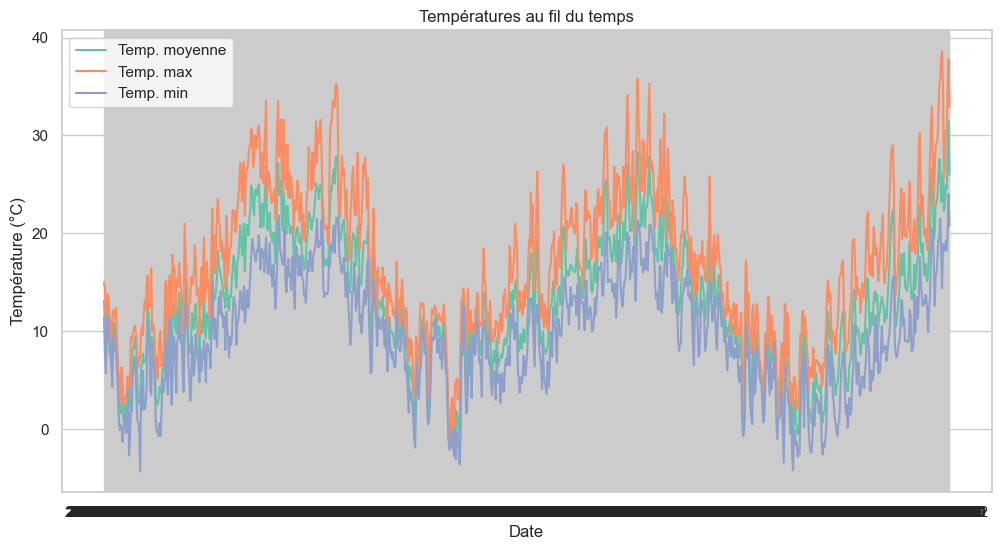

In [17]:
plt.plot(df["date"], df["temp_moyenne"], label="Temp. moyenne")
plt.plot(df["date"], df["temp_max"], label="Temp. max")
plt.plot(df["date"], df["temp_min"], label="Temp. min")
plt.title("Températures au fil du temps")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.legend()
plt.show()

Corrélations

Text(0.5, 1.0, 'Matrice de corrélation')

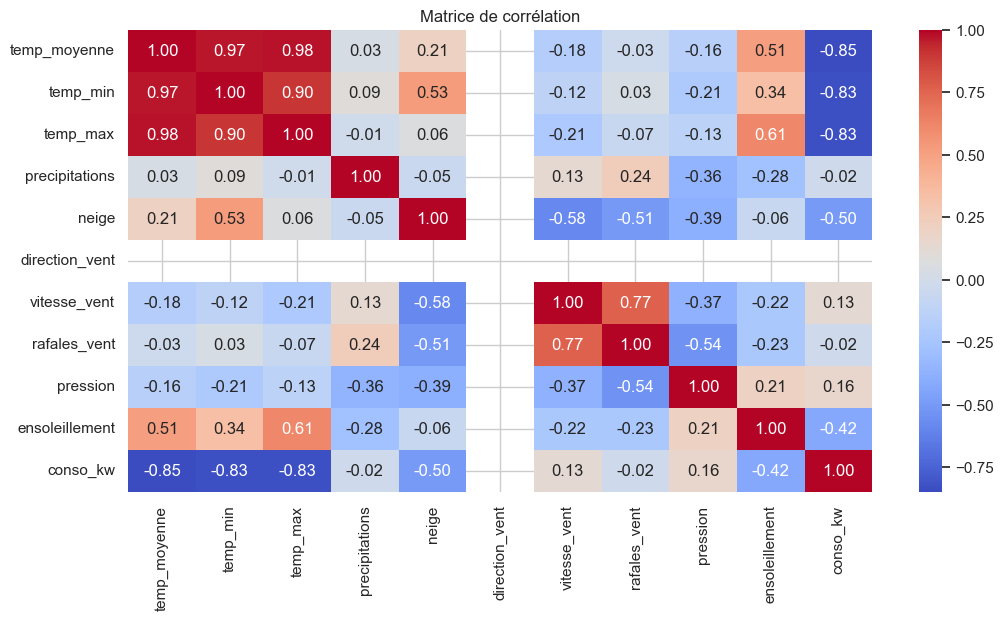

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")

Température vs Consommation

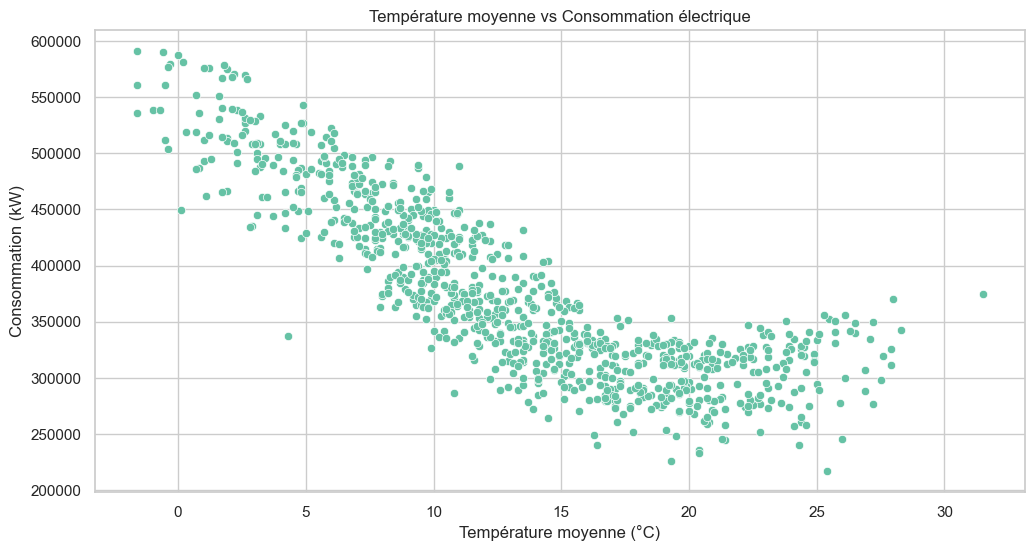

In [14]:
sns.scatterplot(data=df, x="temp_moyenne", y="conso_kw")
plt.title("Température moyenne vs Consommation électrique")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Consommation (kW)")
plt.show()

Droite de régression

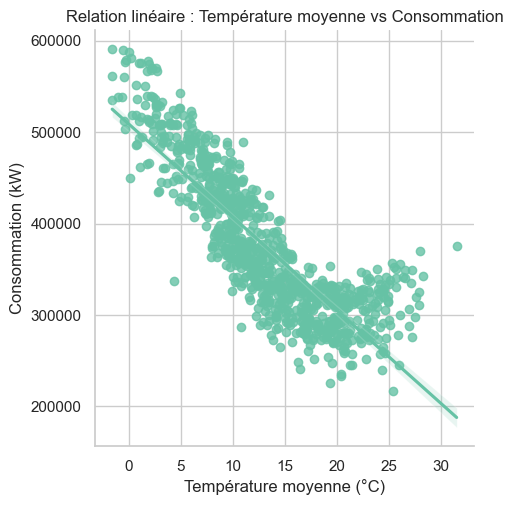

In [15]:
sns.lmplot(data=df, x="temp_moyenne", y="conso_kw")
plt.title("Relation linéaire : Température moyenne vs Consommation")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Consommation (kW)")
plt.show()